In [1]:
#import the libraries
import requests
import string
import re

from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 3.4 MB/s eta 0:00:00


In [8]:
#import dataset
web = requests.get('https://www.ajnn.net/').text
web

'<!DOCTYPE html> <html lang="id-ID" xmlns="http://www.w3.org/1999/xhtml" dir="ltr"> <head><meta charset="utf-8"/> <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1"/> <meta http-equiv="content-language" content="id-ID"/> <meta http-equiv="Content-Security-Policy" content="upgrade-insecure-requests"/> <meta http-equiv="refresh" content="900"/><meta name="HandheldFriendly" content="true"/> <meta name="apple-mobile-web-app-capable" content="yes"/> <meta name="viewport" content="width=1024"/> <meta name="robots" content="index, follow"/> <meta name="robots" content="max-image-preview:large"> <meta content="id" name="language"> <meta content="id" name="geo.country"> <meta content="Indonesia" name="geo.placename"> <base href="https://www.ajnn.net/"/> <title>AJNN.net - Portal Berita Aceh</title> <meta name="theme-color" content="#ED3237"/> <meta name="description" content="Aceh Journal National Network (AJNN) menyajikan berita seputar Aceh, fokus pada isu pemuda, politik dan ekonom

In [9]:
#clean data
soup = BeautifulSoup(web)
for s in soup(['script', 'style']):
  s.decompose()
teks = ' '.join(soup.stripped_strings)
print(teks)

AJNN.net - Portal Berita Aceh Beranda Derap Nusantara Kesehatan Lingkungan Hukum Ekonomi Politik Pilkada Umum Infografis Dunia AJNN TV Opini Liputan Khusus Destinasi Olahraga Coretan Surat Pembaca Profil Kaula Muda Kota Banda Aceh Pendidikan Editorial Berita Foto 7 Februari 2023 Terang Gelap Berita Terkini Umum Perahu Fiber Milik Nelayan Aceh Singkil Terbakar saat Bersandar di Kuala Gabi ACEH SINGKIL – Satu unit perahu fiber milik nelayan Gampong Pulo Surok, Kecamatan Singkil, Kabupaten Aceh Singkil terbakar saat bersandar di Kuala Gabi, daerah... Editorial Mimpi DLHK Menjaga Hutan Aceh MUMPUNG musim hujan segera berakhir, dan anggaran pun baru akan dihabiskan, beberapa pekan ke depan adalah waktu yang tepat untuk mempertanyakan keseriusan Dinas... Hukum Terungkap Fakta Persidangan, HS Transfer Uang Damai Rp70 Juta untuk EW BANDA ACEH - Pengadilan Negeri (PN) Banda Aceh kembali menggelar sidang lanjutan terkait kasus tindak pidana asusila yang diduga dilakukan oleh seorang oknum anggot

In [10]:
#convert all string to lowercase
teks = teks.lower()

#delete all number in string
teks = re.sub(r"\d+", "", teks)

#delete all punctuation
teks = teks.translate(str.maketrans("", "", string.punctuation))

#delete the empty string
teks = teks.strip()

In [11]:
#convert the sentence to be a stemming word
factory = StemmerFactory()
stemmer = factory.create_stemmer()
output = stemmer.stem(teks)
print(output)

ajnnnet portal berita aceh beranda derap nusantara sehat lingkung hukum ekonomi politik pilkada umum infografis dunia ajnn tv opini liput khusus destinasi olahraga coret surat baca profil kaula muda kota banda aceh didik editorial berita foto februari terang gelap berita kini umum perahu fiber milik nelayan aceh singkil bakar saat sandar di kuala gabi aceh singkil satu unit perahu fiber milik nelayan gampong pulo surok camat singkil kabupaten aceh singkil bakar saat sandar di kuala gabi daerah editorial mimpi dlhk jaga hutan aceh mumpung musim hujan segera akhir dan anggar pun baru akan habis beberapa pekan ke depan adalah waktu yang tepat untuk tanya serius dinas hukum ungkap fakta sidang hs transfer uang damai rp juta untuk ew banda aceh adil negeri pn banda aceh kembali gelar sidang lanjut kait kasus tindak pidana asusila yang duga laku oleh orang oknum anggota umum pt pap sanggah pt pema kait calon menang ada sulfur granule banda aceh pt poly arrad pusaka pt pap layang surat berat 

In [12]:
tokens = [t for t in output.split()]
print(tokens)

['ajnnnet', 'portal', 'berita', 'aceh', 'beranda', 'derap', 'nusantara', 'sehat', 'lingkung', 'hukum', 'ekonomi', 'politik', 'pilkada', 'umum', 'infografis', 'dunia', 'ajnn', 'tv', 'opini', 'liput', 'khusus', 'destinasi', 'olahraga', 'coret', 'surat', 'baca', 'profil', 'kaula', 'muda', 'kota', 'banda', 'aceh', 'didik', 'editorial', 'berita', 'foto', 'februari', 'terang', 'gelap', 'berita', 'kini', 'umum', 'perahu', 'fiber', 'milik', 'nelayan', 'aceh', 'singkil', 'bakar', 'saat', 'sandar', 'di', 'kuala', 'gabi', 'aceh', 'singkil', 'satu', 'unit', 'perahu', 'fiber', 'milik', 'nelayan', 'gampong', 'pulo', 'surok', 'camat', 'singkil', 'kabupaten', 'aceh', 'singkil', 'bakar', 'saat', 'sandar', 'di', 'kuala', 'gabi', 'daerah', 'editorial', 'mimpi', 'dlhk', 'jaga', 'hutan', 'aceh', 'mumpung', 'musim', 'hujan', 'segera', 'akhir', 'dan', 'anggar', 'pun', 'baru', 'akan', 'habis', 'beberapa', 'pekan', 'ke', 'depan', 'adalah', 'waktu', 'yang', 'tepat', 'untuk', 'tanya', 'serius', 'dinas', 'hukum',

In [16]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

ajnnnet:3
portal:1
berita:6
aceh:70
beranda:2
derap:1
nusantara:1
sehat:1
lingkung:2
hukum:12
ekonomi:9
politik:2
pilkada:1
infografis:3
dunia:6
ajnn:2
tv:2
opini:4
liput:1
khusus:3
destinasi:2
olahraga:1
coret:1
surat:2
baca:1
profil:1
kaula:1
muda:1
kota:1
banda:11
didik:2
editorial:3
foto:5
februari:34
terang:1
gelap:1
perahu:4
fiber:4
milik:5
nelayan:4
singkil:6
bakar:5
sandar:4
kuala:4
gabi:4
unit:1
gampong:1
pulo:1
surok:1
camat:1
kabupaten:3
daerah:4
mimpi:3
dlhk:3
jaga:4
hutan:3
mumpung:1
musim:1
hujan:1
anggar:1
habis:2
pekan:1
serius:3
dinas:3
fakta:2
sidang:3
hs:2
transfer:2
uang:2
damai:2
rp:2
juta:2
ew:2
adil:1
negeri:1
pn:1
gelar:1
kait:5
tindak:2
pidana:1
asusila:1
duga:5
laku:5
orang:7
oknum:3
anggota:2
pt:9
pap:3
sanggah:3
pema:2
calon:3
menang:3
sulfur:3
granule:3
poly:1
arrad:1
pusaka:1
layang:1
berat:1
aniaya:3
ajar:2
polisi:12
sangka:3
brigadir:1
i:1
hadap:3
remaja:1
simeulue:3
kapolres:1
akbp:1
dpra:3
perintah:7
harap:2
palsu:2
bangun:4
labuh:4
ekspor:4
cpo:4
wib:

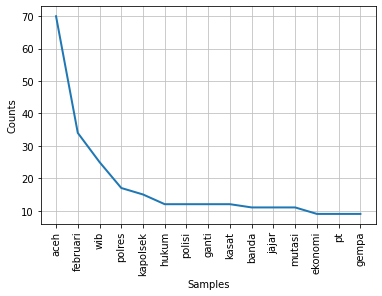

In [17]:
clean_tokens = tokens[:]
for token in tokens:
  if token in stopwords.words('indonesian'):
    clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
  print(str(key) + ":" + str(val))

freq.plot(15)